## Data Visualization Project On Missing Children In US


**Importing Packages**

In [441]:
import pandas as pd
import numpy as np #to read the file
import matplotlib.pyplot as plt #python visualization library
import seaborn as sns #python visualization library
from pandas import Series
from matplotlib.colors import ListedColormap

## Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [442]:
data = pd.read_csv("C:/Users/mahak/Desktop/datamissingchildren.csv",encoding='cp1252')#reading the data

In [443]:
data.head()# displaying the first five rows

,childid,childfirstname,childlastname,birthdate,sex,race,haircolor,eyecolor,height,weight,missingreporteddate,missingfromdate,missingfromcity,missingfromstate,missingfromcountry,ncmeccasenumber,casetype,postercontact,posterurl
0,179184,Gabriela,Gonzalez,1987-09-22,Female,Hispanic,Brown,Brown,501,115,2002-04-18 14:14,2002-04-05 14:00,San Diego,CA,United States,933919,Lost Injured Missing,Chula Vista Police Department (California) 1-...,www.missingkids.org/poster/NCMC/933919/1/
1,179604,Jahi,Turner,2000-02-10,Male,Black,Black,Brown,205,30,2002-04-26 17:10,2002-04-25 14:00,San Diego,CA,United States,934331,Lost Injured Missing,San Diego Police Department (California) 1-619...,www.missingkids.org/poster/NCMC/934331/1/
2,181262,Jesse,Florez,1986-11-12,Male,Hispanic,Brown,Brown,411,120,2002-05-24 13:36,2001-09-14 17:00,Phoenix,AZ,United States,936029,Lost Injured Missing,Phoenix Police Department (Arizona) 1-602-262-...,www.missingkids.org/poster/NCMC/936029/1/
3,186377,Angel,Torres-Irizarry,1974-08-27,Male,White,Blonde,Green,200,30,2002-08-02 8:53,1976-07-06 0:00,Adjuntas,PR,United States,941306,Lost Injured Missing,Department of Justicia (Puerto Rico) 1-787-72...,www.missingkids.org/poster/NCMC/941306/1/
4,195599,Stefanie,Mills,1986-02-24,Female,Black,Black,Brown,506,110,2002-12-04 11:49,2002-03-07 14:45,Pittsburgh,PA,United States,950909,Endangered Runaway,Pittsburgh Police Department (Pennsylvania) 1-...,www.missingkids.org/poster/NCMC/950909/1/


In [444]:
print("size of data", data.shape) #rows and columns in the dataset

size of data (2231, 19)


In [445]:
data.info()#information of all the columns in a dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 19 columns):
childid                2231 non-null int64
childfirstname         2231 non-null object
childlastname          2230 non-null object
birthdate              2231 non-null object
sex                    2231 non-null object
race                   2231 non-null object
haircolor              1915 non-null object
eyecolor               1916 non-null object
height                 2231 non-null int64
weight                 2231 non-null int64
missingreporteddate    2231 non-null object
missingfromdate        2231 non-null object
missingfromcity        2231 non-null object
missingfromstate       2224 non-null object
missingfromcountry     2231 non-null object
ncmeccasenumber        2231 non-null int64
casetype               2231 non-null object
postercontact          2231 non-null object
posterurl              2231 non-null object
dtypes: int64(4), object(15)
memory usage: 331.2+ KB


In [446]:
data.isnull().sum()# checking for missing values

childid                  0
childfirstname           0
childlastname            1
birthdate                0
sex                      0
race                     0
haircolor              316
eyecolor               315
height                   0
weight                   0
missingreporteddate      0
missingfromdate          0
missingfromcity          0
missingfromstate         7
missingfromcountry       0
ncmeccasenumber          0
casetype                 0
postercontact            0
posterurl                0
dtype: int64

Three columns-haircolor,eyecolor and missingfromstate have missing values, Since these are categorical columns so I decided to drop those missing records

In [447]:
df = data.dropna()# dropping the missing values

In [448]:
df.isnull().sum()# checking for missing values

childid                0
childfirstname         0
childlastname          0
birthdate              0
sex                    0
race                   0
haircolor              0
eyecolor               0
height                 0
weight                 0
missingreporteddate    0
missingfromdate        0
missingfromcity        0
missingfromstate       0
missingfromcountry     0
ncmeccasenumber        0
casetype               0
postercontact          0
posterurl              0
dtype: int64

In [449]:
print((df["height"] == 0).sum()) #checking if there is any zero values in this column as a person of height do not exist

1


In [450]:
print((df["weight"] == 0).sum())#checking for zero values

1


In [451]:
#replacing the zero values with NaN
df["height"] = df["height"].replace(0, np.NaN)
df["weight"] = df["weight"].replace(0, np.NaN)

In [452]:
#Replacing the missing values with the mean of the columns
df=df.fillna(df.mean(), inplace=True)

In [453]:
print((df["weight"] == 0).sum())#no zero values

0


In [454]:
print("size of data", df.shape)#count of the data is reduced

size of data (1906, 19)


In [455]:
df.head()

,childid,childfirstname,childlastname,birthdate,sex,race,haircolor,eyecolor,height,weight,missingreporteddate,missingfromdate,missingfromcity,missingfromstate,missingfromcountry,ncmeccasenumber,casetype,postercontact,posterurl
0,179184,Gabriela,Gonzalez,1987-09-22,Female,Hispanic,Brown,Brown,501.0,115.0,2002-04-18 14:14,2002-04-05 14:00,San Diego,CA,United States,933919,Lost Injured Missing,Chula Vista Police Department (California) 1-...,www.missingkids.org/poster/NCMC/933919/1/
1,179604,Jahi,Turner,2000-02-10,Male,Black,Black,Brown,205.0,30.0,2002-04-26 17:10,2002-04-25 14:00,San Diego,CA,United States,934331,Lost Injured Missing,San Diego Police Department (California) 1-619...,www.missingkids.org/poster/NCMC/934331/1/
2,181262,Jesse,Florez,1986-11-12,Male,Hispanic,Brown,Brown,411.0,120.0,2002-05-24 13:36,2001-09-14 17:00,Phoenix,AZ,United States,936029,Lost Injured Missing,Phoenix Police Department (Arizona) 1-602-262-...,www.missingkids.org/poster/NCMC/936029/1/
3,186377,Angel,Torres-Irizarry,1974-08-27,Male,White,Blonde,Green,200.0,30.0,2002-08-02 8:53,1976-07-06 0:00,Adjuntas,PR,United States,941306,Lost Injured Missing,Department of Justicia (Puerto Rico) 1-787-72...,www.missingkids.org/poster/NCMC/941306/1/
4,195599,Stefanie,Mills,1986-02-24,Female,Black,Black,Brown,506.0,110.0,2002-12-04 11:49,2002-03-07 14:45,Pittsburgh,PA,United States,950909,Endangered Runaway,Pittsburgh Police Department (Pennsylvania) 1-...,www.missingkids.org/poster/NCMC/950909/1/


In [456]:
df['birthdate'] = pd.to_datetime(df['birthdate'])# changed the datatype of the column

In [457]:
df['year'] = df['birthdate'].dt.year#extracted the year part

In [458]:
df.head()

,childid,childfirstname,childlastname,birthdate,sex,race,haircolor,eyecolor,height,weight,missingreporteddate,missingfromdate,missingfromcity,missingfromstate,missingfromcountry,ncmeccasenumber,casetype,postercontact,posterurl,year
0,179184,Gabriela,Gonzalez,1987-09-22,Female,Hispanic,Brown,Brown,501.0,115.0,2002-04-18 14:14,2002-04-05 14:00,San Diego,CA,United States,933919,Lost Injured Missing,Chula Vista Police Department (California) 1-...,www.missingkids.org/poster/NCMC/933919/1/,1987
1,179604,Jahi,Turner,2000-02-10,Male,Black,Black,Brown,205.0,30.0,2002-04-26 17:10,2002-04-25 14:00,San Diego,CA,United States,934331,Lost Injured Missing,San Diego Police Department (California) 1-619...,www.missingkids.org/poster/NCMC/934331/1/,2000
2,181262,Jesse,Florez,1986-11-12,Male,Hispanic,Brown,Brown,411.0,120.0,2002-05-24 13:36,2001-09-14 17:00,Phoenix,AZ,United States,936029,Lost Injured Missing,Phoenix Police Department (Arizona) 1-602-262-...,www.missingkids.org/poster/NCMC/936029/1/,1986
3,186377,Angel,Torres-Irizarry,1974-08-27,Male,White,Blonde,Green,200.0,30.0,2002-08-02 8:53,1976-07-06 0:00,Adjuntas,PR,United States,941306,Lost Injured Missing,Department of Justicia (Puerto Rico) 1-787-72...,www.missingkids.org/poster/NCMC/941306/1/,1974
4,195599,Stefanie,Mills,1986-02-24,Female,Black,Black,Brown,506.0,110.0,2002-12-04 11:49,2002-03-07 14:45,Pittsburgh,PA,United States,950909,Endangered Runaway,Pittsburgh Police Department (Pennsylvania) 1-...,www.missingkids.org/poster/NCMC/950909/1/,1986


In [459]:
df['age']=2017-df['year']

In [460]:
df.head()

,childid,childfirstname,childlastname,birthdate,sex,race,haircolor,eyecolor,height,weight,...,missingfromdate,missingfromcity,missingfromstate,missingfromcountry,ncmeccasenumber,casetype,postercontact,posterurl,year,age
0,179184,Gabriela,Gonzalez,1987-09-22,Female,Hispanic,Brown,Brown,501.0,115.0,...,2002-04-05 14:00,San Diego,CA,United States,933919,Lost Injured Missing,Chula Vista Police Department (California) 1-...,www.missingkids.org/poster/NCMC/933919/1/,1987,30
1,179604,Jahi,Turner,2000-02-10,Male,Black,Black,Brown,205.0,30.0,...,2002-04-25 14:00,San Diego,CA,United States,934331,Lost Injured Missing,San Diego Police Department (California) 1-619...,www.missingkids.org/poster/NCMC/934331/1/,2000,17
2,181262,Jesse,Florez,1986-11-12,Male,Hispanic,Brown,Brown,411.0,120.0,...,2001-09-14 17:00,Phoenix,AZ,United States,936029,Lost Injured Missing,Phoenix Police Department (Arizona) 1-602-262-...,www.missingkids.org/poster/NCMC/936029/1/,1986,31
3,186377,Angel,Torres-Irizarry,1974-08-27,Male,White,Blonde,Green,200.0,30.0,...,1976-07-06 0:00,Adjuntas,PR,United States,941306,Lost Injured Missing,Department of Justicia (Puerto Rico) 1-787-72...,www.missingkids.org/poster/NCMC/941306/1/,1974,43
4,195599,Stefanie,Mills,1986-02-24,Female,Black,Black,Brown,506.0,110.0,...,2002-03-07 14:45,Pittsburgh,PA,United States,950909,Endangered Runaway,Pittsburgh Police Department (Pennsylvania) 1-...,www.missingkids.org/poster/NCMC/950909/1/,1986,31


In [461]:
df.age.unique()

array([30, 17, 31, 43, 67, 20, 24, 19, 57, 28, 23, 27, 56, 15, 18, 16, 38,
       25, 29, 26, 12, 14, 21, 11, 55, 53, 54, 13, 62, 10,  9, 69, 64, 40,
       50, 58, 35,  8, 44, 59, 60, 47, 61, 34, 68, 41, 45, 87, 46, 65, 48,
       49, 52, 36, 33, 39, 71, 42, 37, 66, 51, 63, 32,  6, 22, 84,  7,  5,
       75,  4,  3, 77, 70,  1,  2], dtype=int64)

## Missing Ratio of Young & Adults

In [462]:

mean = sum(df["age"])/len(df) #making a separate column for young and adults based on the age column
mean

20.338929695697797

In [463]:
df["age_groups"]='Young'
for row in df.itertuples():
    if(row.age>=mean):
        df.loc[row.Index, "age_groups"]='Adults'

In [464]:
extracted_data = df.ix[:,['age','age_groups']]
extracted_data.head()

,age,age_groups
0,30,Adults
1,17,Young
2,31,Adults
3,43,Adults
4,31,Adults


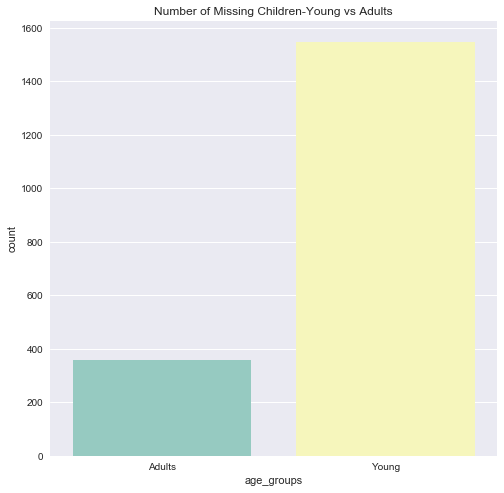

In [465]:
# Barplot representation showing whether young children are missing more or adults are missing

plt.subplots(figsize=(8,8))
sns.countplot(x="age_groups", data=extracted_data, palette="Set3")
plt.title("Number of Missing Children-Young vs Adults")
plt.show()

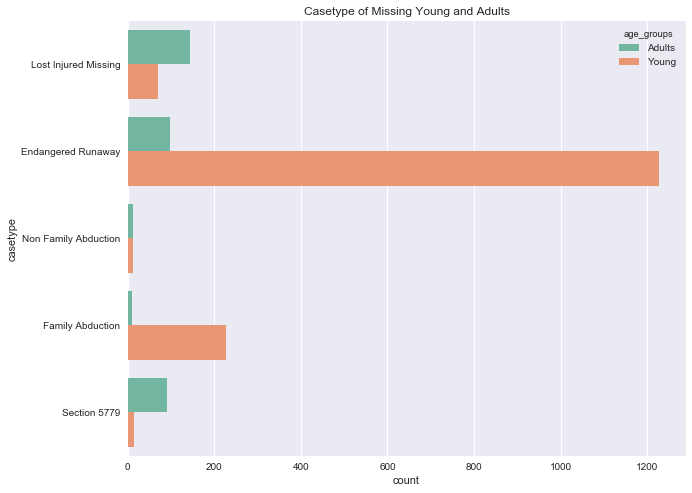

In [466]:
#casetypes and the number of young and adults missing in each casetypes
plt.subplots(figsize=(10,8))
sns.countplot(y="casetype", data=df, hue="age_groups",palette="Set2");
plt.title("Casetype of Missing Young and Adults")
plt.show()

Young children who are of 20 or below 20 years of age are missing more as compared to adults and those young children are missing because they ran away from their families

## Ratio of Male & Female Missing

In [467]:
#count of males or females missing the most
c = pd.DataFrame(df.sex.value_counts())
c.reset_index(inplace=True)
c.columns = ['sex','count']
c

,sex,count
0,Female,1234
1,Male,672


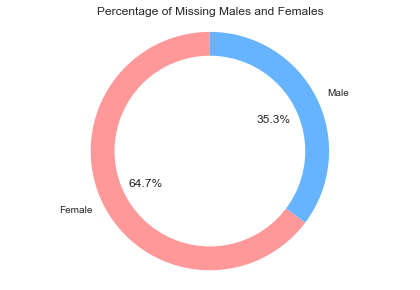

In [468]:
#donut chart displaying the ratio of males and females missing
labels = c['sex']
sizes = c['count']
colors = ['#ff9999','#66b3ff']
fig, ax = plt.subplots()
ax.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.title("Percentage of Missing Males and Females")
plt.show()


Females are missing more than the males

In [469]:
#filtering the data having young males and females to check the number of missing young ones
fem =df[df.sex == 'Female']
fy=fem[fem.age_groups == 'Young']
mal =df[df.sex == 'Male']
my=mal[mal.age_groups == 'Young']

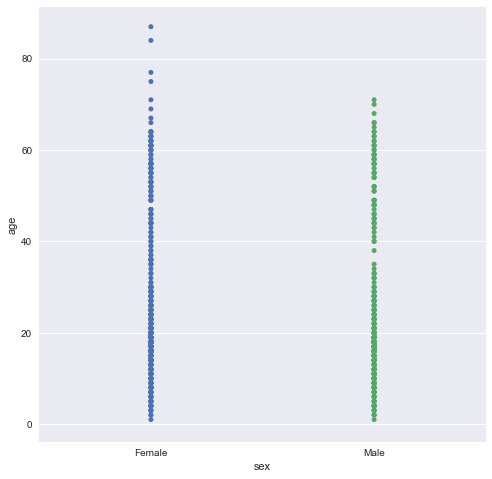

In [470]:
#plot showing the distribution of young males and females according to the age
plt.subplots(figsize=(8,8))
sns.stripplot(x="sex", y="age", data=df);
plt.show()

Children falling in the age_group of below 20 years are missing more as compared to the one above 20 years of age

## Checking the year and month in which children are missing

In [471]:
df['missingfromdate'] = pd.to_datetime(df['missingfromdate'])

In [472]:
df.missingfromdate.dt.year.head()

0    2002
1    2002
2    2001
3    1976
4    2002
Name: missingfromdate, dtype: int64

In [473]:
df['missingyear']=df.missingfromdate.dt.year

In [474]:
df['missingmonth']=df.missingfromdate.dt.month

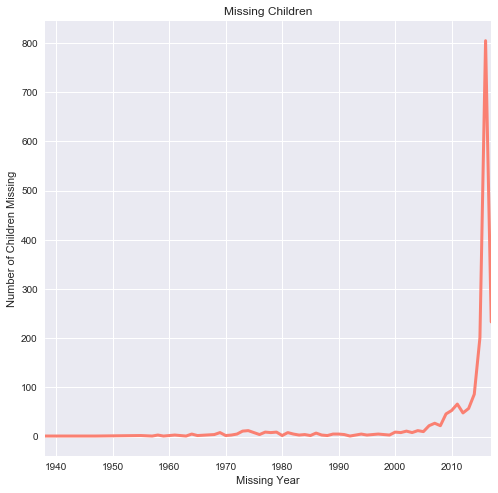

In [475]:
#Trend of Missing Children with Year
plt.subplots(figsize=(8,8))
df.missingyear.value_counts().sort_index().plot(lw=3,color="salmon")
plt.title("Missing Children")
plt.xlabel('Missing Year')
plt.ylabel('Number of Children Missing')
plt.show()

The children were observed missing from the year 2010 and has been increasing till 2017.

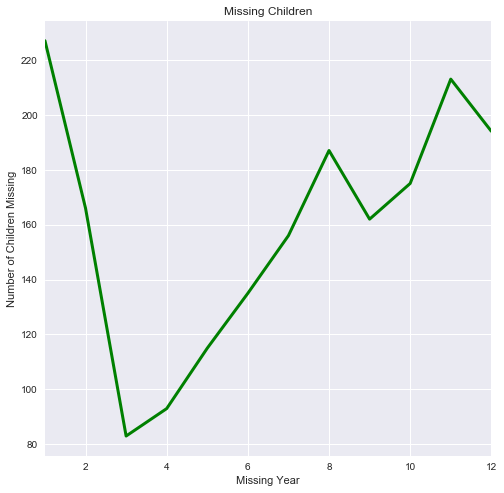

In [476]:
#Trend of Missing Children with Month
plt.subplots(figsize=(8,8))
df.missingmonth.value_counts().sort_index().plot(lw=3,color="green")
plt.title("Missing Children")
plt.xlabel('Missing Year')
plt.ylabel('Number of Children Missing')
plt.show()

The children are missing more in the month of Jan and Feb and later, the trend of missing decreases and increases towards the end of the year.

In [477]:
#Taking the one casetype only
dhkl =df[df.casetype == 'Endangered Runaway']
h = pd.DataFrame(dhkl.missingyear.value_counts())
h.reset_index(inplace=True)
h.columns = ['casetype','count']
h.head()

,missingyear,count
0,2016,805
1,2017,233
2,2015,201
3,2014,86
4,2011,66


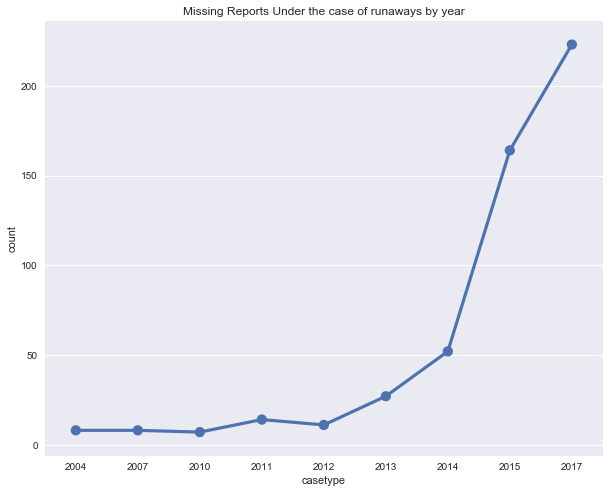

In [504]:
#point plot
plt.subplots(figsize=(10,8))
sns.pointplot(x="casetype", y="count", data=h[1:10]);
plt.title("Missing Reports Under the case of runaways by year")
plt.show()

The cases where children ran away from their families have increased continously.

## Children of Which Race are missing most

In [298]:
df_donut = pd.DataFrame(df.race.value_counts())
df_donut.reset_index(inplace=True)
df_donut.columns = ['race','count']
df_donut

,race,count
0,White,675
1,Hispanic,561
2,Black,383
3,Biracial,220
4,Asian,38
5,Am. Ind.,23
6,Pacific Islander,6


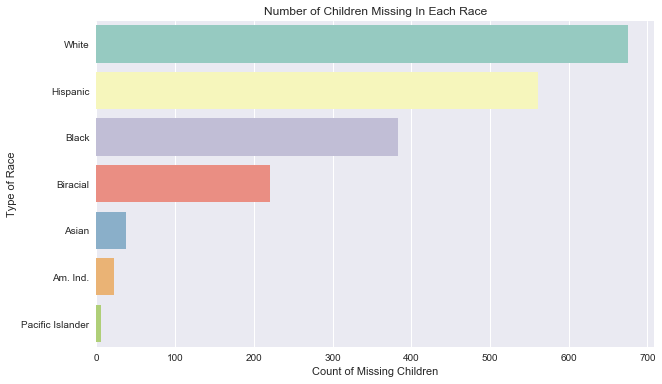

In [299]:
#checking which race has most missing children
plt.subplots(figsize=(10,6))
sns.barplot( y="race",x="count",data=df_donut,palette="Set3");
plt.title("Number of Children Missing In Each Race")
plt.ylabel("Type of Race")
plt.xlabel("Count of Missing Children")
plt.show()

Children falling belonging to White race are missing the most in US.

## Number of Males and Females Missing In Each Race

In [300]:
female_df =df[df.sex == 'Female']
df_female = pd.DataFrame(female_df.race.value_counts())
df_female.reset_index(inplace=True)
df_female.columns = ['race','count']
df_female

,race,count
0,White,414
1,Hispanic,369
2,Black,280
3,Biracial,131
4,Asian,21
5,Am. Ind.,13
6,Pacific Islander,6


In [301]:
male_df =df[df.sex == 'Male']
male_df = pd.DataFrame(male_df.race.value_counts())
male_df.reset_index(inplace=True)
male_df.columns = ['race','count']
male_df

,race,count
0,White,261
1,Hispanic,192
2,Black,103
3,Biracial,89
4,Asian,17
5,Am. Ind.,10


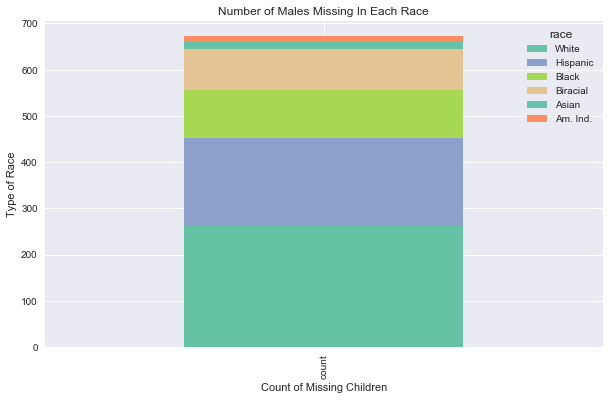

In [303]:
sns.set()
male_df.set_index('race').T.plot(kind="bar",stacked=True, figsize=(10,6),colormap=ListedColormap(sns.color_palette("Set2", 10)));
plt.title("Number of Males Missing In Each Race")
plt.ylabel("Type of Race")
plt.xlabel("Count of Missing Children")
plt.show()

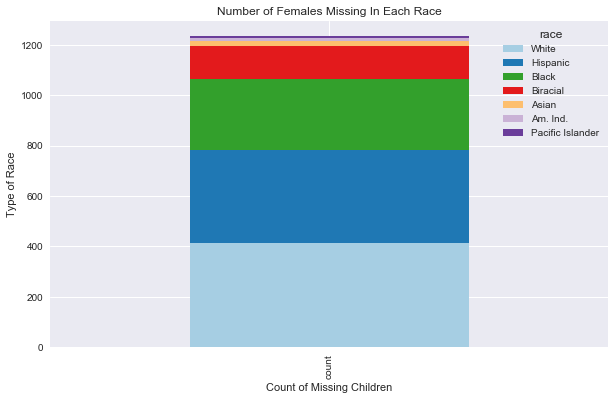

In [304]:
sns.set()
df_female.set_index('race').T.plot(kind="bar",stacked=True, figsize=(10,6),colormap=ListedColormap(sns.color_palette("Paired", 10)));
plt.title("Number of Females Missing In Each Race")
plt.ylabel("Type of Race")
plt.xlabel("Count of Missing Children")
plt.show()

For both males and females, the count of missing children is more for White race.

## Haircolor and Eyecolor of Missing Children

In [359]:
#code for showing the count of children with different hair and eye color
dfg = pd.DataFrame(df.haircolor.value_counts())
dfg.reset_index(inplace=True)
dfg.columns = ['haircolor','count']

dfe = pd.DataFrame(df.eyecolor.value_counts())
dfe.reset_index(inplace=True)
dfe.columns = ['eyecolor','count']


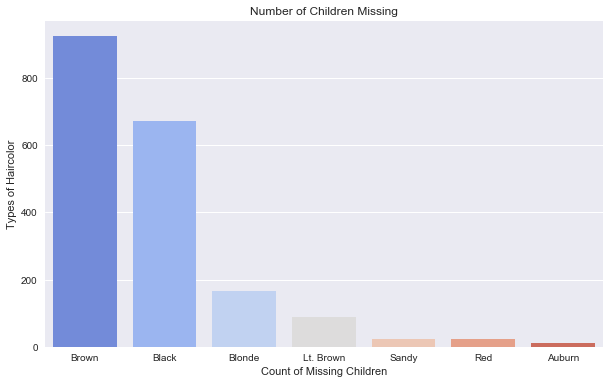

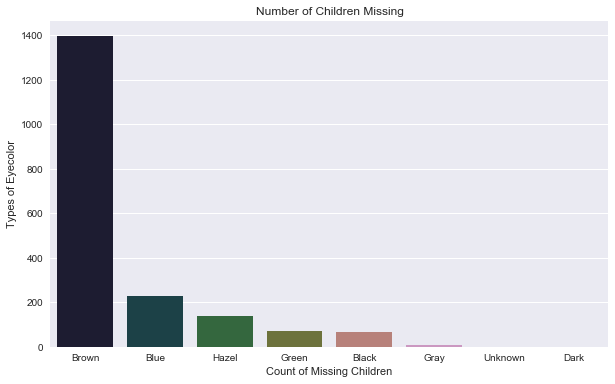

In [368]:
plt.subplots(figsize=(10,6))
sns.barplot( x="haircolor",y="count",data=dfg,palette="coolwarm");
plt.title("Number of Children Missing")
plt.ylabel("Types of Haircolor")
plt.xlabel("Count of Missing Children")
plt.show()

plt.subplots(figsize=(10,6))
sns.barplot( x="eyecolor",y="count",data=dfe,palette="cubehelix");
plt.title("Number of Children Missing")
plt.ylabel("Types of Eyecolor")
plt.xlabel("Count of Missing Children")
plt.show()

## Height and Weight of the Missing Children

Whenever a missing report is filed for a child, the height and weight are noted down as they play an important role in locating the missing person.

In [307]:
dfht = pd.DataFrame(df.height.value_counts())
dfht.reset_index(inplace=True)
dfht.columns = ['height','count']
dfht.head()

,height,count
0,504.0,199
1,505.0,178
2,506.0,168
3,503.0,161
4,502.0,139


In [308]:
dfwt = pd.DataFrame(df.weight.value_counts())
dfwt.reset_index(inplace=True)
dfwt.columns = ['weight','count']
dfwt.head()

,weight,count
0,120.0,161
1,130.0,143
2,140.0,126
3,150.0,108
4,110.0,99


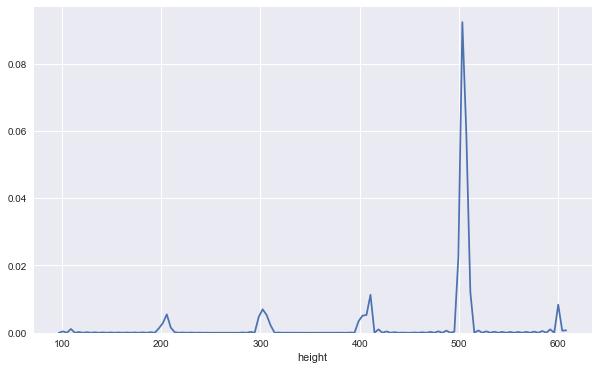

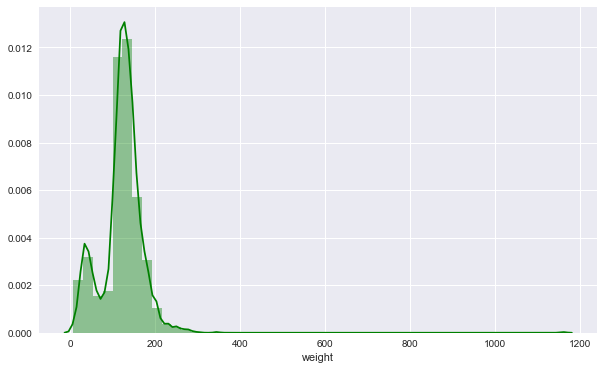

In [309]:
#plot showing the distribution of height in the dataset
plt.subplots(figsize=(10,6))
data = df['height']
sns.distplot(data, hist=False)
#dfht['count'].plot(kind="density")
plt.show()

#plot showing the distribution of weight in the dataset
plt.subplots(figsize=(10,6))
data1 = df['weight']
sns.distplot(data1, hist=True,color="green")
plt.show()

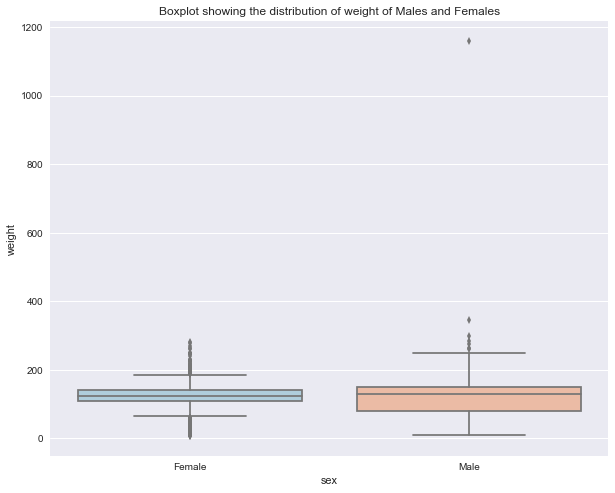

In [521]:
plt.subplots(figsize=(10,8))
sns.boxplot(x="sex", y="weight",data=df,palette="RdBu_r");
plt.title("Boxplot showing the distribution of weight of Males and Females")
plt.show()

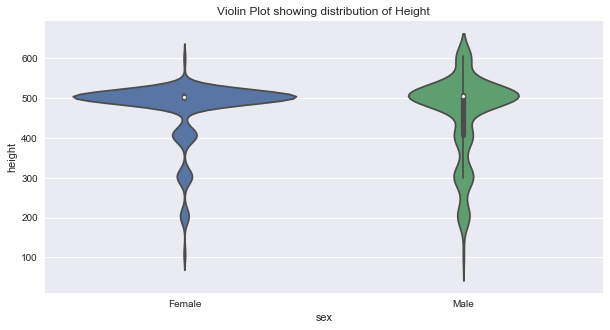

In [522]:
plt.subplots(figsize=(10,5))
sns.violinplot(x="sex", y="height",data=df);
plt.title("Violin Plot showing distribution of Height")
plt.show()

## CaseTypes of Missing Children

In [313]:
#count of children missing in each casetype
df_casetype = pd.DataFrame(df.casetype.value_counts())
df_casetype.reset_index(inplace=True)
df_casetype.columns = ['casetype','count']
df_casetype

,casetype,count
0,Endangered Runaway,1326
1,Family Abduction,237
2,Lost Injured Missing,214
3,Section 5779,105
4,Non Family Abduction,24


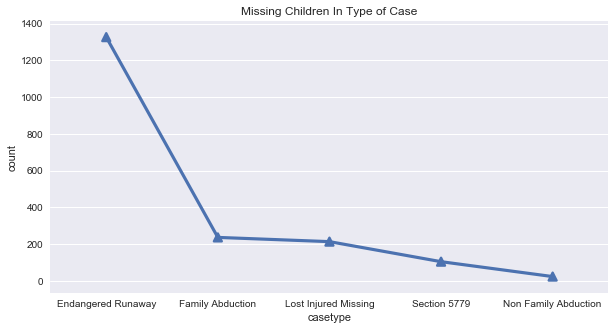

In [438]:
#this pointplot shows the number of children are missing because they ran away from their families
plt.subplots(figsize=(10,5))
sns.pointplot(x="casetype", y="count", markers="^",data=df_casetype);
plt.title("Missing Children In Type of Case")
plt.show()

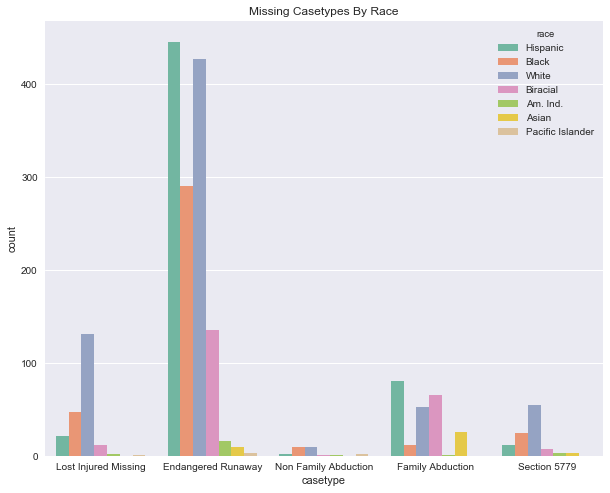

In [439]:
#checking which race has most missing cases- It was observed that the children of hispanic race are missing most as they ran away
plt.subplots(figsize=(10,8))
sns.countplot(x="casetype", data=df, hue="race",palette="Set2");
plt.title("Missing Casetypes By Race")
plt.show()

TreeMap visualization for the above case is in separate ipynb file

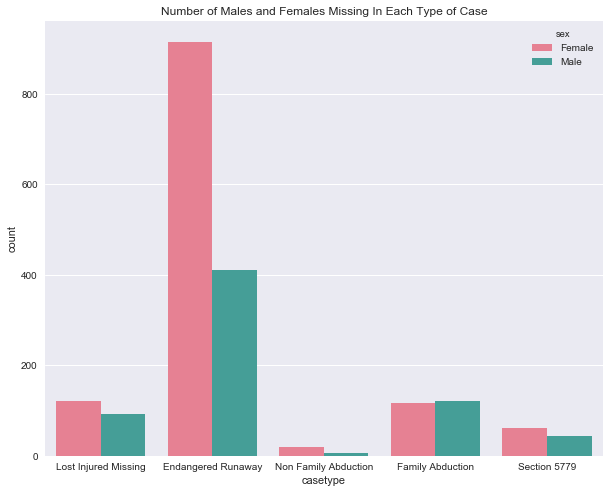

In [437]:
#Gender and Casetype
plt.subplots(figsize=(10,8))
sns.countplot(x="casetype", data=df, hue="sex",palette="husl");
plt.title("Number of Males and Females Missing In Each Type of Case")
plt.show()

More females are missing because they ran away from their families and in brief, the dataset has more case under endangered runaways.